In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.columns)
print(fish.head())

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')
  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [ ]:
target_data = fish['Weight'].to_numpy()
input_data = fish[['Length','Diagonal','Height','Width']].to_numpy()
print(input_data.shape,target_data.shape)
idx_zero = (target_data == 0)
input_data = input_data[~idx_zero]
target_data = target_data[~idx_zero]
print(input_data.shape,target_data.shape)
print(input_data.shape,target_data.shape)
print(target_data)


(159, 4) (159,)
(158, 4) (158,)
(158, 4) (158,)
[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
  110.   120.   150.   145.   160.   140.   160.   169.   161.   200.
  180.   290.   272.   390.   270.   270.   306.   540.   800.  1000.
   55.    60.    90.   120.   150.   140.   170.   145.   200.   273.
  300.     5.9   32.    40.    51.5   70.   100.    78.    80.    85.
   85.   110.   115.   125.   130.   120.   120.   130.   135.   110.
  130.   150.   145.   150.   170.   225.   145.   188.   180.   197.
  218.   300.   260.   265.   250.   250.   300.   320.   514.   556.
  840.   685.   700.   700.   690.   900.   650.   820.   850.   900.
 1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.   300.
  300.   430.   345.   456.   510.   540. 

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input_data,target_data,test_size=0.2,random_state=42)
print(train_input.shape, test_input.shape)

(126, 4) (32, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
ss_train_input = ss.transform(train_input)
ss_test_input = ss.transform(test_input)
print(ss_train_input[:5])
print(ss_test_input[:5])

[[ 1.67519511  1.54673006 -0.25560057  0.27949915]
 [-0.1630231  -0.14711294 -0.16897413 -0.09209743]
 [ 1.48665991  1.36337592  0.8956928   1.90926255]
 [-0.65321462 -0.71463766 -0.60073365 -0.51929897]
 [-1.49219626 -1.52663456 -1.56994971 -1.87354877]]
[[ 0.5439839   0.59503477 -0.76648578 -0.14620763]
 [-0.5400935  -0.52255237 -0.56004325 -0.64426065]
 [ 1.34525851  1.26733328 -0.49263444  0.0337611 ]
 [-1.31308782 -1.37820502 -1.46140928 -1.39630277]
 [-0.5400935  -0.60986386 -0.73015856 -0.46548772]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train_input)
mm_train_input = mm.transform(train_input)
mm_test_input = mm.transform(test_input)
print(mm_train_input[:5])
print(mm_test_input[:5])

[[0.68363636 0.67398649 0.35574832 0.56644092]
 [0.32909091 0.34628378 0.37651774 0.47434093]
 [0.64727273 0.63851351 0.63178062 0.97037685]
 [0.23454545 0.23648649 0.27299975 0.36845927]
 [0.07272727 0.07939189 0.04062202 0.03280924]]
[[0.46545455 0.48986486 0.23325928 0.46092974]
 [0.25636364 0.27364865 0.28275562 0.33748759]
 [0.62       0.61993243 0.29891745 0.50553489]
 [0.10727273 0.10810811 0.06664551 0.15109438]
 [0.25636364 0.25675676 0.24196904 0.38179636]]


In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(loss='squared_error',max_iter=10000, tol=1e-7)
sgdr.fit(mm_train_input, train_target)
print(sgdr.score(mm_train_input, train_target))
print(sgdr.score(mm_test_input, test_target))
train_pred = sgdr.predict(mm_train_input)
test_pred = sgdr.predict(mm_test_input)

0.8741027091617943
0.8974065523244845


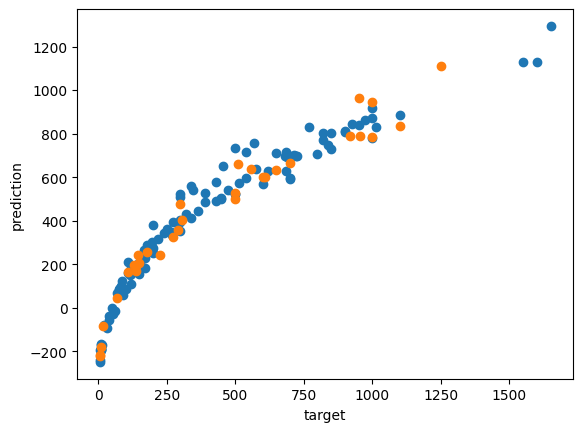

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_target, train_pred)
plt.scatter(test_target, test_pred)
plt.xlabel('target')
plt.ylabel('prediction')
plt.show()

### 1. California Housing Dataset
This dataset contains information from the 1990 California census. It's often used as a replacement for the older Boston Housing dataset due to ethical concerns with the latter. The target variable is the median house value for California districts.

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
X_california = california_housing.data
y_california = california_housing.target

print("California Housing Dataset:")
print(f"Features shape: {X_california.shape}")
print(f"Target shape: {y_california.shape}")
print(california_housing.DESCR[:500] + "...")
display(X_california.head())

### 2. Diabetes Dataset
This is a relatively small dataset with 442 patients, containing 10 physiological features (age, sex, body mass index, average blood pressure, and six blood serum measurements). The target is a quantitative measure of disease progression one year after baseline.

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("\nDiabetes Dataset:")
print(f"Features shape: {X_diabetes.shape}")
print(f"Target shape: {y_diabetes.shape}")
print(diabetes.DESCR[:500] + "...")
display(X_diabetes.head())

### 3. Boston Housing Dataset (Deprecated for ethical reasons)
*Note: This dataset is often used in tutorials but is now deprecated in scikit-learn due to ethical concerns regarding the data collection and its potential for misuse. It's better to use `fetch_california_housing` instead.* If you still need to load it, you might find it in older versions or use alternative sources.

In [ ]:
# from sklearn.datasets import load_boston # This import might warn about deprecation or be removed
# try:
#     boston = load_boston(as_frame=True)
#     X_boston = boston.data
#     y_boston = boston.target
#     print("\nBoston Housing Dataset:")
#     print(f"Features shape: {X_boston.shape}")
#     print(f"Target shape: {y_boston.shape}")
#     print(boston.DESCR[:500] + "...")
#     display(X_boston.head())
# except Exception as e:
#     print(f"Could not load Boston Housing dataset: {e}")
#     print("Consider using `fetch_california_housing` instead.")

print("Boston Housing Dataset is deprecated due to ethical concerns. Please use `fetch_california_housing` or other datasets.")

### 4. Linnerrud Dataset
A small dataset for multi-output regression. It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men.

In [ ]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud(as_frame=True)
X_linnerud = linnerud.data
y_linnerud = linnerud.target

print("\nLinnerrud Dataset:")
print(f"Features shape: {X_linnerud.shape}")
print(f"Target shape: {y_linnerud.shape}")
print(linnerud.DESCR[:500] + "...")
display(X_linnerud.head())
display(y_linnerud.head())

### 5. `make_regression` for Synthetic Data
If you need a dataset with specific characteristics (number of features, samples, noise, etc.), `make_regression` can generate synthetic data for you.

In [ ]:
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X_synth, y_synth = make_regression(
    n_samples=100,      # number of samples
    n_features=5,       # number of features
    n_informative=3,    # number of informative features
    n_targets=1,        # number of regression targets
    noise=0.5,          # standard deviation of the gaussian noise
    random_state=42
)

print("\nSynthetic Regression Dataset:")
print(f"Features shape: {X_synth.shape}")
print(f"Target shape: {y_synth.shape}")
print("First 5 features:\n", X_synth[:5])
print("First 5 targets:\n", y_synth[:5])